In [1]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
import pandas as pd

# Assuming df1 is your big dataset and df2 is your smaller dataset
# Make sure both DataFrames have a column named 'id'
input_file = 'sterimol/IDPiDataset_noI.xlsx'

# Specify the column number (0-based index) containing strings
# Read the CSV file into a DataFrame
df1 = pd.read_excel(input_file)
print(len(df1[:]))
def delete_rows_with_same_values(df, columns_to_check):
    X = df.copy()  # Make a copy of the DataFrame to avoid modifying the original
    X.sort_values(by="ddG", ascending=False)
    # Identify rows where specified columns have the same value
    rows_to_delete = X.duplicated(subset=columns_to_check, keep='first') 

    # Invert the boolean mask to keep rows that don't have the same values in specified columns
    X_filtered = X[~rows_to_delete]

    return X_filtered

columns_to_check_for_duplicates = ['electrophile SMILES', 'nucleophile SMILES',
        '3,3â€™ Catalyst Substituent ', 'Temperature K','solvent',
        'N Catalyst Substituent']
df1 = delete_rows_with_same_values(df1, columns_to_check_for_duplicates)
input_file2 = 'sterimol/results_sterimol.csv'
print(len(df1[:]))
df2 = pd.read_csv(input_file2)


# Merge the two DataFrames on the 'id' column
result = pd.merge(df1 ,df2, left_on='3,3â€™ Catalyst Substituent ', right_on='old_name', how='left')
#result = result[result['electrophile SMILES'] != result['nucleophile SMILES']]

result.to_csv("sterimol/merged.csv")

277
266


In [3]:
result = pd.read_csv("sterimol/merged_final.csv")
#result = result[result['electrophile SMILES'] != result['nucleophile SMILES']]
#result=result.reset_index(drop=True)
df2 = pd.read_csv('sterimol/results_sterimol_V.csv')


result



,Unnamed: 0.1,reaction,electrophile SMILES,nucleophile SMILES,ReactionSMILES,"3,3â€™ Catalyst Substituent",N Catalyst Substituent,catalyst SMILES,solvent,time (hours),...,0_crippen_y,1_crippen_y,2_crippen_y,3_crippen_y,4_crippen_y,0_mcgowan_y,1_mcgowan_y,2_mcgowan_y,3_mcgowan_y,4_mcgowan_y
0,0,1a,O=Cc2ccc1ccccc1c2,C=CC[Si](C)(C)C,O=Cc2ccc1ccccc1c2C=CC[Si](C)(C)C,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,O=S(=O)(N=P%14(N=P5(NS(=O)(=O)C(F)(F)F)Oc4c(c2...,toluene,96,...,6.064,3.509,8.814,8.753,8.753,8.02,4.55,16.04,12.57,12.57
1,1,1b,COc2ccc1cc(C=O)ccc1c2,C=CC[Si](C)(C)C,COc2ccc1cc(C=O)ccc1c2C=CC[Si](C)(C)C,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,O=S(=O)(N=P%14(N=P5(NS(=O)(=O)C(F)(F)F)Oc4c(c2...,toluene,192,...,6.064,3.509,8.814,8.753,8.753,8.02,4.55,16.04,12.57,12.57
2,2,1c,O=Cc2ccc1cc(Br)ccc1c2,C=CC[Si](C)(C)C,O=Cc2ccc1cc(Br)ccc1c2C=CC[Si](C)(C)C,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,O=S(=O)(N=P%14(N=P5(NS(=O)(=O)C(F)(F)F)Oc4c(c2...,toluene,192,...,6.064,3.509,8.814,8.753,8.753,8.02,4.55,16.04,12.57,12.57
3,3,1d,O=Cc1ccccc1,C=CC[Si](C)(C)C,O=Cc1ccccc1C=CC[Si](C)(C)C,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,O=S(=O)(N=P%14(N=P5(NS(=O)(=O)C(F)(F)F)Oc4c(c2...,toluene,48,...,6.064,3.509,8.814,8.814,4.407,8.02,4.55,16.04,16.04,8.02
4,4,1e,O=Cc1ccccc1F,C=CC[Si](C)(C)C,O=Cc1ccccc1FC=CC[Si](C)(C)C,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,O=S(=O)(N=P%14(N=P5(NS(=O)(=O)C(F)(F)F)Oc4c(c2...,toluene,48,...,6.064,3.509,7.664,9.922,4.407,8.02,4.55,12.57,21.27,8.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,261,3e,CC/C=C(C)/C=O,C1=CCC=C1,CC/C=C(C)/C=OC1=CCC=C1,c3ccc2ccc1ccccc1c2c3,NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,NaN,CH2Cl2,96,...,6.064,3.513,10.244,4.617,5.674,8.02,4.55,19.70,8.21,11.68
258,262,3f,O=CC1=CCCCC1,C1=CCC=C1,O=CC1=CCCCC1C1=CCC=C1,c3ccc2ccc1ccccc1c2c3,NS(=O)(=O)C(F)(F)C(F)(F)F,NaN,CH2Cl2,96,...,6.064,3.513,9.187,9.234,4.617,8.02,4.55,16.23,16.42,8.21
259,263,3u,C/C=C(C)/C=O,C1=CCC=C1,C/C=C(C)/C=OC1=CCC=C1,c3ccc2ccc1ccccc1c2c3,NS(=O)(=O)C(F)(F)C(F)(F)F,NaN,CH2Cl2,72,...,6.064,3.513,10.244,5.674,0.000,8.02,4.55,19.70,11.68,0.00
260,264,3v,O=CC1=CCCC1,C1=CCC=C1,O=CC1=CCCC1C1=CCC=C1,c3ccc2ccc1ccccc1c2c3,NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,NaN,CH2Cl2,72,...,6.064,3.513,9.187,9.234,0.000,8.02,4.55,16.23,16.42,0.00


In [4]:
from common_functions import *

electrophileSMILES = result['electrophile SMILES'].values
electrophiledescriptors = smi2RDKIT(electrophileSMILES)
nucleophileSMILES = result['nucleophile SMILES'].values
nucleophiledescriptors = smi2RDKIT(nucleophileSMILES)
threethreesubSMILES = result['3,3â€™ Catalyst Substituent '].values
threethreesubdescriptors = smi2RDKIT(threethreesubSMILES)
"""nsubSMILES = result['N Catalyst Substituent'].values
nsubdescriptors = smi2RDKIT(nsubSMILES)"""

"nsubSMILES = result['N Catalyst Substituent'].values\nnsubdescriptors = smi2RDKIT(nsubSMILES)"

In [5]:
#alldescriptors = electrophiledescriptors.join(nucleophiledescriptors, lsuffix='electrophile', rsuffix='nucleophile').join(threethreesubdescriptors, rsuffix='threethreesub').join(nsubdescriptors, rsuffix='nsubdescriptors')
alldescriptors = electrophiledescriptors.join(nucleophiledescriptors, lsuffix='electrophile', rsuffix='nucleophile').join(threethreesubdescriptors, rsuffix='threethreesub')#.join(nsubdescriptors, rsuffix='nsubdescriptors')

alldescriptors.to_csv('alldescriptors.csv', index=False)
def delete_columns_with_string(df, string_to_exclude):
    X = df.copy()  # Make a copy of the DataFrame to avoid modifying the original
    
    # Delete columns that include the specified string
    columns_to_delete = [col for col in X.columns if string_to_exclude in col]
    X_filtered = X.drop(columns=columns_to_delete)

    return X_filtered
alldescriptors = delete_columns_with_string(alldescriptors, "AbsPartialCharge")

alldescriptors

,MaxAbsEStateIndexelectrophile,MaxEStateIndexelectrophile,MinAbsEStateIndexelectrophile,MinEStateIndexelectrophile,qedelectrophile,MolWtelectrophile,HeavyAtomMolWtelectrophile,ExactMolWtelectrophile,NumValenceElectronselectrophile,NumRadicalElectronselectrophile,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,10.450170,10.450170,0.730278,0.730278,0.579913,156.184,148.120,156.057515,58.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.548588,10.548588,0.696914,0.696914,0.673793,186.210,176.130,186.068080,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.507847,10.507847,0.717428,0.717428,0.691883,235.080,228.024,233.968027,64.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.006481,10.006481,0.729167,0.729167,0.495636,106.124,100.076,106.041865,40.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12.358704,12.358704,0.108796,-0.465278,0.519899,124.114,119.074,124.032443,46.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,9.826481,9.826481,0.821759,0.821759,0.377957,98.145,88.065,98.073165,40.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,10.091620,10.091620,0.971389,0.971389,0.469249,110.156,100.076,110.073165,44.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259,9.667593,9.667593,0.787037,0.787037,0.343827,84.118,76.054,84.057515,34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260,9.938843,9.938843,0.951389,0.951389,0.449462,96.129,88.065,96.057515,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:
result.columns

Index(['Unnamed: 0.1', 'reaction', 'electrophile SMILES', 'nucleophile SMILES',
       'ReactionSMILES', '3,3â€™ Catalyst Substituent ',
       'N Catalyst Substituent', 'catalyst SMILES', 'solvent', 'time (hours)',
       ...
       '0_crippen_y', '1_crippen_y', '2_crippen_y', '3_crippen_y',
       '4_crippen_y', '0_mcgowan_y', '1_mcgowan_y', '2_mcgowan_y',
       '3_mcgowan_y', '4_mcgowan_y'],
      dtype='object', length=101)

In [6]:

unique_counts = alldescriptors.nunique()

# Get the column names where there is more than one unique value
cols_to_keep = unique_counts[unique_counts > 1].index

# Create a new DataFrame with only the selected columns
result_df = alldescriptors[cols_to_keep]
result_df

,MaxAbsEStateIndexelectrophile,MaxEStateIndexelectrophile,MinAbsEStateIndexelectrophile,MinEStateIndexelectrophile,qedelectrophile,MolWtelectrophile,HeavyAtomMolWtelectrophile,ExactMolWtelectrophile,NumValenceElectronselectrophile,MaxPartialChargeelectrophile,...,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_alkyl_halide,fr_aryl_methyl,fr_benzene,fr_bicyclic,fr_halogen,fr_unbrch_alkane
0,10.450170,10.450170,0.730278,0.730278,0.579913,156.184,148.120,156.057515,58.0,0.149570,...,0.0,2.0,2.8398,43.948,0.0,0.0,2.0,1.0,0.0,0.0
1,10.548588,10.548588,0.696914,0.696914,0.673793,186.210,176.130,186.068080,70.0,0.149570,...,0.0,2.0,2.8398,43.948,0.0,0.0,2.0,1.0,0.0,0.0
2,10.507847,10.507847,0.717428,0.717428,0.691883,235.080,228.024,233.968027,64.0,0.149570,...,0.0,2.0,2.8398,43.948,0.0,0.0,2.0,1.0,0.0,0.0
3,10.006481,10.006481,0.729167,0.729167,0.495636,106.124,100.076,106.041865,40.0,0.149548,...,0.0,2.0,2.8398,43.948,0.0,0.0,2.0,1.0,0.0,0.0
4,12.358704,12.358704,0.108796,-0.465278,0.519899,124.114,119.074,124.032443,46.0,0.152494,...,0.0,2.0,2.8398,43.948,0.0,0.0,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,9.826481,9.826481,0.821759,0.821759,0.377957,98.145,88.065,98.073165,40.0,0.144920,...,0.0,3.0,3.9930,61.454,0.0,0.0,3.0,3.0,0.0,0.0
258,10.091620,10.091620,0.971389,0.971389,0.469249,110.156,100.076,110.073165,44.0,0.145202,...,0.0,3.0,3.9930,61.454,0.0,0.0,3.0,3.0,0.0,0.0
259,9.667593,9.667593,0.787037,0.787037,0.343827,84.118,76.054,84.057515,34.0,0.144910,...,0.0,3.0,3.9930,61.454,0.0,0.0,3.0,3.0,0.0,0.0
260,9.938843,9.938843,0.951389,0.951389,0.449462,96.129,88.065,96.057515,38.0,0.145202,...,0.0,3.0,3.9930,61.454,0.0,0.0,3.0,3.0,0.0,0.0


In [1533]:
from sklearn.feature_selection import VarianceThreshold

VT = VarianceThreshold()
descriptors = VT.fit_transform(result_df)
len(descriptors)


256

In [8]:
col_names = ['ddG','ster1', 'ster2', 'solvent',
       'ster3',  
       'electrophile SMILES', 'nucleophile SMILES',#'Atom1_charge', 'Valance_atom1', 
       #'TotalNBO_atom1',# 'Atom2_charge', 'Valance_atom2',#
       #'TotalNBO_atom2',
       'HOMO',
       'N Catalyst Substituent', 'Temperature K',
       'polarxx',  'polaryy', 
       'polarzz', 'mean_polar', #'HOMO', 'LUMO',
       'biggest distance',
       'major_axis', 'Axis_2', 'Axis_3' ,
       'L_x', 'Bmin_x', 'Bmax_x', 'bur_vol_x', 
       'nL', 'nBmin', 'nBmax', 'nbur_vol', 
        '3,3â€™ Catalyst Substituent ',
       'tot_V_x', 'disp_x',  
       #'min_axis_x',
       'Vbur75',#
       # 'Vbur35', 
       #'Vbur5', 
        'tot_V_y', 'disp_y',  
        #'min_axis_y', 
        '2_crippen_x','3_crippen_x', '4_crippen_x', 
        '2_crippen_y', '3_crippen_y', '4_crippen_y',
       'max_distance_x','max_distance_y'#'A2_x',  #'A2_y',
       #'0_mcgowan_x', '1_mcgowan_x','2_mcgowan_x', '3_mcgowan_x', '4_mcgowan_x', 
       #'0_mcgowan_y', '1_mcgowan_y', '2_mcgowan_y', '3_mcgowan_y', '4_mcgowan_y'
      ]
DFT_data = result.loc[:,col_names]

DFT_data["Temperature K"] = 1/DFT_data["Temperature K"]
DFT_data["std_pol"] = DFT_data[['polarxx','polaryy','polarzz']].std(axis=1)
#DFT_data["max_pol"] = DFT_data[['polarxx','polaryy','polarzz']].max(axis=1)
DFT_data["Box_vol"] = DFT_data['major_axis']*DFT_data['Axis_2']*DFT_data['Axis_3']
DFT_data["RAxis_2"] = DFT_data['Axis_2']/DFT_data['major_axis']
DFT_data["RAxis_3"] = DFT_data['Axis_3']/DFT_data['major_axis']
DFT_data["disp_x"] = DFT_data['disp_x']/DFT_data['max_distance_x']
DFT_data["disp_y"] = DFT_data['disp_y']/DFT_data['max_distance_y']




#DFT_data["M_V_x"]=DFT_data["tot_V_x"]*DFT_data["bur_vol_x"]
#DFT_data["M_V_y"]=DFT_data["tot_V_y"]*DFT_data["nbur_vol"]

DFT_data = DFT_data.drop(['polarxx','polaryy','polarzz','major_axis','Axis_2','Axis_3', 'max_distance_x','max_distance_y'],axis=1)
encoder = OneHotEncoder(drop='first', sparse=False)  # 'drop' parameter avoids multicollinearity
#X_encoded = pd.DataFrame(encoder.fit_transform(DFT_data[['N Catalyst Substituent']]), columns=encoder.get_feature_names_out(['N Catalyst Substituent']))


DFT_data['Ncat_alif'] = DFT_data['N Catalyst Substituent'].apply(lambda x: 1 if x == 'NS(=O)(=O)C(F)(F)F' else (2 if x == 'NS(=O)(=O)C(F)(F)C(F)(F)F' else (4 if x == 'NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F' else ( 6 if x == 'NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F' else 0))))

# Create another column 'DifferentColumn' and assign values based on different conditions
DFT_data['Ncat_arom'] = DFT_data['N Catalyst Substituent'].apply(lambda x: 1 if x == 'NS(=O)(=O)c1c(F)c(F)c(F)c(F)c1F' else 0)

DFT_data['solv_dipol'] = DFT_data['solvent'].apply(lambda x: 3.1 if x == 'CH2Cl2' else (4.1 if x == 'CHCl3' else (0.2 if x == 'cyclohexane' else ( 3.1 if x == 'DCM' else ( 2.8 if x == 'Et2O' else ( 2.3 if x == 'M-xylene' else ( 0.2 if x == 'Methyl-cyclohexane' or x=='methylcyclohexane' or x=='Methylcyclohexane' else ( 2.3 if x == 'P-xylene'  else ( 2.4 if x == 'toluene'  else np.NaN)))))))))
DFT_data['solv_dipol'] = DFT_data['solv_dipol'].fillna(np.mean(DFT_data['solv_dipol']))
##DFT_data = delete_rows_with_same_values(DFT_data, columns_to_check_for_duplicates).reset_index(drop=True)
# Concatenate the encoded columns with the original features
#DFT_data = pd.concat([DFT_data.drop('N Catalyst Substituent', axis=1), X_encoded], axis=1)
DFT_data = DFT_data.drop(['N Catalyst Substituent','solvent','3,3â€™ Catalyst Substituent '], axis=1)
RT=result.loc[:,'Temperature K']*1.988*10**(-3)
#ddg= np.exp(-result.loc[:,'ddG']/(RT))
ddg= result.loc[:,'ddG']

ddg


0      1.231712
1      1.066407
2      1.002518
3      0.896691
4      1.033884
         ...   
257    1.338303
258    1.338303
259    1.092856
260    1.195347
261    0.537292
Name: ddG, Length: 262, dtype: float64

In [9]:
import pickle
with open('sterimol/subsets_electrophile.pickle', 'rb') as infile:
    subsets_e = pickle.load(infile)
with open('sterimol/subsets_nucleophile.pickle', 'rb') as infile:
    subsets_n = pickle.load(infile)



def create_matrix(data_dict):
    unique_smi_values = set(entry[key] for entry in data_dict.values() for key in ['smi1', 'smi2'])

    # Create an empty similarity matrix
    num_unique_values = len(unique_smi_values)
    similarity_matrix = np.zeros((num_unique_values, num_unique_values))

    # Create a dictionary to map each unique value to its index in the matrix
    value_to_index = {value: index for index, value in enumerate(unique_smi_values)}
    smi1_to_matrix_index = {smi1: [] for smi1 in unique_smi_values}
    
    # Fill in the similarity matrix with 'tan_mcs' or 'tan_12' values
    for entry in data_dict.values():
        index1 = value_to_index[entry['smi1']]
        smi1_to_matrix_index[entry['smi1']].extend([index1])
        # Check if 'smi2' exists in the entry
        if 'smi2' in entry:
            index2 = value_to_index[entry['smi2']]
            smi1_to_matrix_index[entry['smi2']].append(index2)
            
            # Assuming either 'tan_mcs' or 'tan_12' will be present in each entry
            tan_value_key = 'tan_mcs' 
            
            similarity_matrix[index1, index2] = entry[tan_value_key]
            similarity_matrix[index2, index1] = entry[tan_value_key]

        
 
        
    # Convert lists of row indices to unique sets
    smi1_to_matrix_index = {smi1: list(set(indices)) for smi1, indices in smi1_to_matrix_index.items()}
    
    return similarity_matrix, smi1_to_matrix_index



mat_e, dict_e = create_matrix(subsets_e)
mat_n, dict_n = create_matrix(subsets_n)

dict_n["CO/C(O[Si](C)(C)C)=C/1CCCCC1"]
dict_n


{'C=CC(=C)C': [0],
 'C1=CCCC=C1': [1],
 'C=C/C=C/C': [2],
 'C/C(=C\\CCc1ccccc1)C(=O)/C=C/C(C)C': [3],
 'CC/C=C(C)/C(=O)/C=C/C1CCCC1': [4],
 'CO/C(O[Si](C)(C)C)=C/1CCCCC1': [5],
 'CC/C=C(C)/C(=O)/C=C/c1ccccc1Br': [6],
 'CO/C(O[Si](C)(C)C)=C/1CCC1': [7],
 'C=C/C=C/C1CCCCC1': [8],
 'CC/C=C(C)/C(=O)/C=C/C1CC1': [9],
 'C/C=C(C)/C(=O)/C=C/C(C)(C)C': [10],
 'CO/C(=C\\C(C)C)O[Si](C)(C)C': [11],
 'C=C(O[Si](C)(C)C(C)(C)C)c1ccccc1': [12],
 'C=CC[Si](C)(C)C': [13],
 'C=C(C)/C=C/C': [14],
 'C=C(OCc1ccccc1)O[Si](C)(C)C': [15],
 'C=C(/C=C/c1ccccc1)O[Si](C)(C)C(C)(C)C': [16],
 'CC/C=C(C)/C(=O)/C=C/C(CC)CC': [17],
 'C=C(C)C(=C)C': [18],
 'C=C(OC)O[Si](C)(C)C': [19],
 'C=C(OCc1ccccc1)O[Si](C)(C)C(C)(C)C': [20],
 'C/C(=C\\CCCCCl)C(=O)/C=C/C(C)C': [21],
 'CC/C=C(C)/C(=O)/C=C/C1CCCCC1': [22],
 'CC/C=C(C)/C(=O)/C=C/C1CCC1': [23],
 'C1=CCC=C1': [24],
 'C=C(OC1CCCCC1)O[Si](C)(C)C(C)(C)C': [25],
 'C=C(OC)O[Si](C)(C)C(C)(C)C': [26],
 'C=C(OC)O[Si](CC)(CC)CC': [27],
 'C=CO[Si](C)(C)C(C)(C)C': [28],
 'CCCCC/C=C(

In [10]:
DFT_data

,ddG,ster1,ster2,ster3,electrophile SMILES,nucleophile SMILES,HOMO,Temperature K,mean_polar,biggest distance,...,2_crippen_y,3_crippen_y,4_crippen_y,std_pol,Box_vol,RAxis_2,RAxis_3,Ncat_alif,Ncat_arom,solv_dipol
0,1.231712,8.98,1.7,4.42,O=Cc2ccc1ccccc1c2,C=CC[Si](C)(C)C,-0.26066,0.005124,189.93,11.427206,...,8.814,8.753,8.753,99.013021,130.584488,0.473305,0.185862,1,0,2.4
1,1.066407,8.98,1.7,4.42,COc2ccc1cc(C=O)ccc1c2,C=CC[Si](C)(C)C,-0.26066,0.005124,189.93,11.427206,...,8.814,8.753,8.753,99.013021,130.584488,0.473305,0.185862,1,0,2.4
2,1.002518,8.98,1.7,4.42,O=Cc2ccc1cc(Br)ccc1c2,C=CC[Si](C)(C)C,-0.26066,0.005124,189.93,11.427206,...,8.814,8.753,8.753,99.013021,130.584488,0.473305,0.185862,1,0,2.4
3,0.896691,8.98,1.7,4.42,O=Cc1ccccc1,C=CC[Si](C)(C)C,-0.26066,0.005124,189.93,11.427206,...,8.814,8.814,4.407,99.013021,130.584488,0.473305,0.185862,1,0,2.4
4,1.033884,8.98,1.7,4.42,O=Cc1ccccc1F,C=CC[Si](C)(C)C,-0.26066,0.004692,189.93,11.427206,...,7.664,9.922,4.407,99.013021,130.584488,0.473305,0.185862,1,0,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1.338303,11.15,1.7,4.49,CC/C=C(C)/C=O,C1=CCC=C1,-0.26240,0.005775,245.02,13.541996,...,10.244,4.617,5.674,141.535154,170.347416,0.409886,0.167639,4,0,3.1
258,1.338303,11.15,1.7,4.49,O=CC1=CCCCC1,C1=CCC=C1,-0.26240,0.005775,245.02,13.541996,...,9.187,9.234,4.617,141.535154,170.347416,0.409886,0.167639,2,0,3.1
259,1.092856,11.15,1.7,4.49,C/C=C(C)/C=O,C1=CCC=C1,-0.26240,0.005775,245.02,13.541996,...,10.244,5.674,0.000,141.535154,170.347416,0.409886,0.167639,2,0,3.1
260,1.195347,11.15,1.7,4.49,O=CC1=CCCC1,C1=CCC=C1,-0.26240,0.005775,245.02,13.541996,...,9.187,9.234,0.000,141.535154,170.347416,0.409886,0.167639,4,0,3.1


In [1622]:
param_grid = {
    'n_estimators': [10,20,50, 75, 100],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4,6,8]
}

In [422]:
VT = VarianceThreshold()
descriptors = VT.fit_transform(result_df)
np.shape(descriptors)

(257, 87)

In [841]:
from sklearn.feature_selection import VarianceThreshold

def feature_reducer(df):
    X = df.copy()  # Make a copy of the DataFrame to avoid modifying the original
    
    # Apply VarianceThreshold
    VT = VarianceThreshold()
    descriptors = VT.fit_transform(X)
    
    # Get the columns that are retained by VarianceThreshold
    columns_after_variance_threshold = X.columns[VT.get_support()]
    
    # Create a DataFrame after VarianceThreshold
    X_after_variance_threshold = X[columns_after_variance_threshold]

    # Calculate the correlation matrix for the DataFrame after VarianceThreshold
    correlation_matrix = X_after_variance_threshold.corr()

    # Set a correlation threshold
    correlation_threshold = 0.9  # You can adjust this based on your requirements

    # Create a mask to identify highly correlated features
    corr_mask = (correlation_matrix.abs() > correlation_threshold) & (correlation_matrix.abs() < 1)

    # Identify the columns to keep (those not highly correlated)
    columns_to_keep = X_after_variance_threshold.columns[~corr_mask.any()]

    # Create the final filtered DataFrame with retained column names
    X_filtered = X_after_variance_threshold[columns_to_keep]

    return X_filtered



nucleophiledescriptors = feature_reducer(nucleophiledescriptors)
#threethreesubdescriptors = feature_reducer(threethreesubdescriptors)
"""nsubdescriptors = feature_reducer(nsubdescriptors)
"""
electrophiledescriptors = feature_reducer(electrophiledescriptors)
#alldescriptors = electrophiledescriptors.join(nucleophiledescriptors, lsuffix='electrophile', rsuffix='nucleophile').join(threethreesubdescriptors, rsuffix='threethreesub').join(nsubdescriptors, rsuffix='nsubdescriptors')

alldescriptors = electrophiledescriptors.join(nucleophiledescriptors, lsuffix='electrophile', rsuffix='nucleophile')#.join(nsubdescriptors, rsuffix='nsubdescriptors')
alldescriptors = feature_reducer(alldescriptors)
#alldescriptors = delete_columns_with_string(alldescriptors, "AbsPartialCharge")
alldescriptors

,MaxAbsEStateIndexelectrophile,MaxEStateIndexelectrophile,MinAbsEStateIndexelectrophile,MinEStateIndex,qedelectrophile,FpDensityMorgan1electrophile,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWLOWelectrophile,BCUT2D_LOGPHI,...,VSA_EState5nucleophile,VSA_EState7nucleophile,VSA_EState8nucleophile,VSA_EState9,NumAliphaticHeterocycles,NumSaturatedHeterocyclesnucleophile,RingCountnucleophile,fr_alkyl_halidenucleophile,fr_aryl_methylnucleophile,fr_unbrch_alkanenucleophile
0,10.450170,10.450170,0.730278,0.730278,0.579913,0.916667,1.666667,2.416667,10.085499,2.135515,...,0.0,2.020062,10.706597,-0.77527,0.0,0.0,0.0,0.0,0.0,0.0
1,10.548588,10.548588,0.696914,0.696914,0.673793,1.071429,1.785714,2.500000,10.077790,2.206303,...,0.0,2.020062,10.706597,-0.77527,0.0,0.0,0.0,0.0,0.0,0.0
2,10.507847,10.507847,0.717428,0.717428,0.691883,1.000000,1.692308,2.461538,10.084982,2.197046,...,0.0,2.020062,10.706597,-0.77527,0.0,0.0,0.0,0.0,0.0,0.0
3,10.006481,10.006481,0.729167,0.729167,0.495636,1.125000,1.750000,2.125000,10.236032,1.909959,...,0.0,2.020062,10.706597,-0.77527,0.0,0.0,0.0,0.0,0.0,0.0
4,12.358704,12.358704,0.108796,-0.465278,0.519899,1.333333,2.000000,2.444444,10.217133,2.008867,...,0.0,2.020062,10.706597,-0.77527,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,9.826481,9.826481,0.821759,0.821759,0.377957,1.714286,2.285714,2.428571,10.269758,1.867847,...,0.0,9.500000,0.000000,0.00000,0.0,0.0,1.0,0.0,0.0,0.0
253,10.091620,10.091620,0.971389,0.971389,0.469249,1.500000,2.375000,2.750000,10.010597,2.139417,...,0.0,9.500000,0.000000,0.00000,0.0,0.0,1.0,0.0,0.0,0.0
254,9.667593,9.667593,0.787037,0.787037,0.343827,1.666667,2.166667,2.166667,10.330052,1.797093,...,0.0,9.500000,0.000000,0.00000,0.0,0.0,1.0,0.0,0.0,0.0
255,9.938843,9.938843,0.951389,0.951389,0.449462,1.714286,2.571429,2.857143,10.260013,2.136217,...,0.0,9.500000,0.000000,0.00000,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
# choose 200 molecular descriptors
chosen_descriptors  = ['ExactMolWt',  'Kappa1', 'MaxEStateIndex', 'MaxPartialCharge',   'MinEStateIndex', 'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NumRotatableBonds', 'PEOE_VSA1', 'SMR_VSA1', 'SlogP_VSA1', 'VSA_EState1', 'qed']
chosen_descriptors  = ['Kappa1','MaxPartialCharge',   'MinEStateIndex', 'MinPartialCharge', 'MolLogP',  'qed','ExactMolWt']
chosen_descriptors2 = ['ExactMolWt', 'MaxPartialCharge',    'MolLogP',  'fr_C_S']


In [12]:
def add_suffixes(input_list,input_list2):
    result_list = []
    for entry in input_list:
        result_list.append(entry + 'electrophile')
        result_list.append(entry + 'nucleophile')
    for entry in input_list2:
        result_list.append(entry + '')
    return result_list

# Example list


# Add suffixes '_e' and '_n' to each entry
output_list = add_suffixes(chosen_descriptors,chosen_descriptors2)

# Display the result
print(output_list)

['Kappa1electrophile', 'Kappa1nucleophile', 'MaxPartialChargeelectrophile', 'MaxPartialChargenucleophile', 'MinEStateIndexelectrophile', 'MinEStateIndexnucleophile', 'MinPartialChargeelectrophile', 'MinPartialChargenucleophile', 'MolLogPelectrophile', 'MolLogPnucleophile', 'qedelectrophile', 'qednucleophile', 'ExactMolWtelectrophile', 'ExactMolWtnucleophile', 'ExactMolWt', 'MaxPartialCharge', 'MolLogP', 'fr_C_S']


In [13]:

unique_counts = alldescriptors.nunique()

# Get the column names where there is more than one unique value
cols_to_keep = unique_counts[unique_counts > 1].index

# Create a new DataFrame with only the selected columns
result_df = alldescriptors[output_list]
result_df

,Kappa1electrophile,Kappa1nucleophile,MaxPartialChargeelectrophile,MaxPartialChargenucleophile,MinEStateIndexelectrophile,MinEStateIndexnucleophile,MinPartialChargeelectrophile,MinPartialChargenucleophile,MolLogPelectrophile,MolLogPnucleophile,qedelectrophile,qednucleophile,ExactMolWtelectrophile,ExactMolWtnucleophile,ExactMolWt,MaxPartialCharge,MolLogP,fr_C_S
0,7.042665,6.956883,0.149570,0.047963,0.730278,-0.775270,-0.297896,-0.103369,2.6523,2.5106,0.579913,0.382049,156.057515,114.086477,128.06260,-0.018404,2.8398,0.0
1,8.754380,6.956883,0.149570,0.047963,0.696914,-0.775270,-0.496745,-0.103369,2.6609,2.5106,0.673793,0.382049,186.068080,114.086477,128.06260,-0.018404,2.8398,0.0
2,8.448344,6.956883,0.149570,0.047963,0.717428,-0.775270,-0.297896,-0.103369,3.4148,2.5106,0.691883,0.382049,233.968027,114.086477,128.06260,-0.018404,2.8398,0.0
3,5.035138,6.956883,0.149548,0.047963,0.729167,-0.775270,-0.297896,-0.103369,1.4991,2.5106,0.495636,0.382049,106.041865,114.086477,128.06260,-0.018404,2.8398,0.0
4,5.947877,6.956883,0.152494,0.047963,-0.465278,-0.775270,-0.297781,-0.103369,1.6382,2.5106,0.519899,0.382049,124.032443,114.086477,128.06260,-0.018404,2.8398,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,6.410000,2.703214,0.144920,-0.016293,0.821759,1.138889,-0.298281,-0.080750,1.5416,1.5025,0.377957,0.401713,98.073165,66.046950,178.07825,-0.010542,3.9930,0.0
258,5.544953,2.703214,0.145202,-0.016293,0.971389,1.138889,-0.298269,-0.080750,1.6857,1.5025,0.469249,0.401713,110.073165,66.046950,178.07825,-0.010542,3.9930,0.0
259,5.410000,2.703214,0.144910,-0.016293,0.787037,1.138889,-0.298281,-0.080750,1.1515,1.5025,0.343827,0.401713,84.057515,66.046950,178.07825,-0.010542,3.9930,0.0
260,4.566006,2.703214,0.145202,-0.016293,0.951389,1.138889,-0.298269,-0.080750,1.2956,1.5025,0.449462,0.401713,96.057515,66.046950,178.07825,-0.010542,3.9930,0.0


In [14]:
alldesc = pd.concat([result_df ,DFT_data], axis=1)
#alldesc.columns=alldesc.columns.astype(str)

alldesc

,Kappa1electrophile,Kappa1nucleophile,MaxPartialChargeelectrophile,MaxPartialChargenucleophile,MinEStateIndexelectrophile,MinEStateIndexnucleophile,MinPartialChargeelectrophile,MinPartialChargenucleophile,MolLogPelectrophile,MolLogPnucleophile,...,2_crippen_y,3_crippen_y,4_crippen_y,std_pol,Box_vol,RAxis_2,RAxis_3,Ncat_alif,Ncat_arom,solv_dipol
0,7.042665,6.956883,0.149570,0.047963,0.730278,-0.775270,-0.297896,-0.103369,2.6523,2.5106,...,8.814,8.753,8.753,99.013021,130.584488,0.473305,0.185862,1,0,2.4
1,8.754380,6.956883,0.149570,0.047963,0.696914,-0.775270,-0.496745,-0.103369,2.6609,2.5106,...,8.814,8.753,8.753,99.013021,130.584488,0.473305,0.185862,1,0,2.4
2,8.448344,6.956883,0.149570,0.047963,0.717428,-0.775270,-0.297896,-0.103369,3.4148,2.5106,...,8.814,8.753,8.753,99.013021,130.584488,0.473305,0.185862,1,0,2.4
3,5.035138,6.956883,0.149548,0.047963,0.729167,-0.775270,-0.297896,-0.103369,1.4991,2.5106,...,8.814,8.814,4.407,99.013021,130.584488,0.473305,0.185862,1,0,2.4
4,5.947877,6.956883,0.152494,0.047963,-0.465278,-0.775270,-0.297781,-0.103369,1.6382,2.5106,...,7.664,9.922,4.407,99.013021,130.584488,0.473305,0.185862,1,0,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,6.410000,2.703214,0.144920,-0.016293,0.821759,1.138889,-0.298281,-0.080750,1.5416,1.5025,...,10.244,4.617,5.674,141.535154,170.347416,0.409886,0.167639,4,0,3.1
258,5.544953,2.703214,0.145202,-0.016293,0.971389,1.138889,-0.298269,-0.080750,1.6857,1.5025,...,9.187,9.234,4.617,141.535154,170.347416,0.409886,0.167639,2,0,3.1
259,5.410000,2.703214,0.144910,-0.016293,0.787037,1.138889,-0.298281,-0.080750,1.1515,1.5025,...,10.244,5.674,0.000,141.535154,170.347416,0.409886,0.167639,2,0,3.1
260,4.566006,2.703214,0.145202,-0.016293,0.951389,1.138889,-0.298269,-0.080750,1.2956,1.5025,...,9.187,9.234,0.000,141.535154,170.347416,0.409886,0.167639,4,0,3.1


In [50]:
from sklearn.preprocessing import PowerTransformer
xtrain, xtest, ytrain, ytest = train_test_split(alldesc, ddg, test_size=0.2, random_state=1)

nuc_uniq_train = np.unique(xtrain['nucleophile SMILES'])
ele_uniq_train = np.unique(xtrain['electrophile SMILES'])
nuc_uniq_test = np.unique(xtest['nucleophile SMILES'])
ele_uniq_test = np.unique(xtest['electrophile SMILES'])

average_ddg_by_name_n = xtrain.groupby('nucleophile SMILES')['ddG'].mean().reset_index()
average_ddg_by_name_e = xtrain.groupby('electrophile SMILES')['ddG'].mean().reset_index()



In [44]:
def create_sub_matrix(similarity_matrix, smi1_to_matrix_index, smi1_list):
    
    # Extract row indices for valid 'smi1' values
    row_indices = [index for smi in smi1_list for index in smi1_to_matrix_index[smi]]

    # Create the sub-matrix
    sub_matrix = similarity_matrix[row_indices, :][:, row_indices]

    return sub_matrix

def create_sub_matrix_test(similarity_matrix, smi1_to_matrix_index, list1, list2):

    # Extract row indices for valid 'list1' and 'list2' values
    indices_list1 = [index for smi in list1 for index in smi1_to_matrix_index[smi]]
    indices_list2 = [index for smi in list2 for index in smi1_to_matrix_index[smi]]

    # Create the sub-matrix
    sub_matrix = similarity_matrix[indices_list1 , :][:, indices_list2]
    
    return sub_matrix

def create_ddg_sim(mat,vec):
    for i in range(len(vec)):
    
        mat[i,:]=mat[i,:]*average_ddg_by_name_e['ddG'][i]

    max_ddg=np.max(mat,axis=0)
    min_ddg=np.where(mat>0, mat, np.inf).min(axis=0)
    min_ddg=np.where(min_ddg==np.inf, 0, min_ddg)
    return max_ddg, min_ddg

def preprocess(xtrain, xtest ,mat_e, dict_e,mat_n, dict_n,sim_par=0.7):
    nuc_uniq_train = np.unique(xtrain['nucleophile SMILES'])
    ele_uniq_train = np.unique(xtrain['electrophile SMILES'])
    nuc_uniq_test = np.unique(xtest['nucleophile SMILES'])
    ele_uniq_test = np.unique(xtest['electrophile SMILES'])

    average_ddg_by_name_n = xtrain.groupby('nucleophile SMILES')['ddG'].mean().reset_index()
    average_ddg_by_name_e = xtrain.groupby('electrophile SMILES')['ddG'].mean().reset_index()
        
    mat_e[mat_e < sim_par] = 0
    mat_n[mat_n < sim_par] = 0

    train_sim_e = create_sub_matrix(mat_e, dict_e, average_ddg_by_name_e['electrophile SMILES'])
    train_sim_n = create_sub_matrix(mat_n, dict_n, average_ddg_by_name_n['nucleophile SMILES'])
    test_sim_e = create_sub_matrix_test(mat_e, dict_e, average_ddg_by_name_e['electrophile SMILES'], ele_uniq_test)
    test_sim_n = create_sub_matrix_test(mat_n, dict_n, average_ddg_by_name_n['nucleophile SMILES'], nuc_uniq_test)
    train_sim_ddg_e = np.divide(np.dot(train_sim_e,average_ddg_by_name_e['ddG']),np.sum(train_sim_e, axis=0))
    train_sim_ddg_n = np.divide(np.dot(train_sim_n,average_ddg_by_name_n['ddG']),np.sum(train_sim_n, axis=0))
    test_sim_ddg_e = np.divide(np.dot(average_ddg_by_name_e['ddG'],test_sim_e),np.sum(test_sim_e, axis=0))
    test_sim_ddg_n = np.divide(np.dot(average_ddg_by_name_n['ddG'],test_sim_n),np.sum(test_sim_n, axis=0))

    mean_e=np.mean(average_ddg_by_name_e['ddG'])
    mean_n=np.mean(average_ddg_by_name_n['ddG'])

    min_e_train,max_e_train = create_ddg_sim(np.where(train_sim_e != 0, 1.0, 0.0),average_ddg_by_name_e['ddG'])
    min_n_train,max_n_train = create_ddg_sim(np.where(train_sim_n != 0, 1.0, 0.0),average_ddg_by_name_n['ddG'])
    min_e_test,max_e_test = create_ddg_sim(np.where(test_sim_e != 0, 1.0, 0.0),average_ddg_by_name_e['ddG'])
    min_n_test,max_n_test = create_ddg_sim(np.where(test_sim_n != 0, 1.0, 0.0),average_ddg_by_name_n['ddG'])

    average_ddg_by_name_e["simddg_e"]=train_sim_ddg_e
    average_ddg_by_name_e = average_ddg_by_name_e.drop(columns=['ddG']).fillna(mean_e)
    average_ddg_by_name_n["simddg_n"]=train_sim_ddg_n
    average_ddg_by_name_n = average_ddg_by_name_n.drop(columns=['ddG']).fillna(mean_n)

    average_ddg_by_name_e["num_sim_e"] = np.count_nonzero(train_sim_e, axis=0)
    average_ddg_by_name_e["sim_avg_e"] = np.nan_to_num(np.nanmean(np.where(train_sim_e>0, train_sim_e, np.nan),0),0)
    average_ddg_by_name_n["num_sim_n"] = np.count_nonzero(train_sim_n, axis=0)
    average_ddg_by_name_n["sim_avg_n"] = np.nan_to_num(np.nanmean(np.where(train_sim_n>0, train_sim_n, np.nan),0),0)

    non_zero_e_test = np.count_nonzero(test_sim_e, axis=0)
    sim_avg_e_test = np.nan_to_num(np.nanmean(np.where(test_sim_e>0, test_sim_e, np.nan),0),0)
    non_zero_n_test = np.count_nonzero(test_sim_n, axis=0)
    sim_avg_n_test = np.nan_to_num(np.nanmean(np.where(test_sim_n>0, test_sim_n, np.nan),0),0)

    average_ddg_by_name_e["min_ddg_e"] = min_e_train
    average_ddg_by_name_n["min_ddg_n"] = min_n_train
    average_ddg_by_name_e["max_ddg_e"] = max_e_train
    average_ddg_by_name_n["max_ddg_n"] = max_n_train

    min_ddg_test_e = min_e_test
    min_ddg_test_n = min_n_test
    max_ddg_test_e = max_e_test
    max_ddg_test_n = max_n_test

    test_ddg_n = pd.DataFrame(np.transpose([nuc_uniq_test,test_sim_ddg_n,non_zero_n_test,sim_avg_n_test,min_ddg_test_n,max_ddg_test_n]), columns=['nucleophile SMILES', "simddg_n","num_sim_n","sim_avg_n","min_ddg_n","max_ddg_n"]).fillna(mean_n)
    test_ddg_e = pd.DataFrame(np.transpose([ele_uniq_test,test_sim_ddg_e,non_zero_e_test,sim_avg_e_test,min_ddg_test_e,max_ddg_test_e]), columns=['electrophile SMILES', "simddg_e","num_sim_e","sim_avg_e","min_ddg_e","max_ddg_e"]).fillna(mean_e)

    xtrain = pd.merge(xtrain,average_ddg_by_name_e,how='left',on='electrophile SMILES')
    xtrain = pd.merge(xtrain,average_ddg_by_name_n,how='left',on='nucleophile SMILES')

    xtest = pd.merge(xtest,test_ddg_e,how='left',on='electrophile SMILES')
    xtest = pd.merge(xtest,test_ddg_n,how='left',on='nucleophile SMILES')
    return xtrain, xtest

In [45]:
def create_sub_matrix(similarity_matrix, smi1_to_matrix_index, smi1_list):
    
    # Extract row indices for valid 'smi1' values
    row_indices = [index for smi in smi1_list for index in smi1_to_matrix_index[smi]]

    # Create the sub-matrix
    sub_matrix = similarity_matrix[row_indices, :][:, row_indices]

    return sub_matrix

def create_sub_matrix_test(similarity_matrix, smi1_to_matrix_index, list1, list2):

    # Extract row indices for valid 'list1' and 'list2' values
    indices_list1 = [index for smi in list1 for index in smi1_to_matrix_index[smi]]
    indices_list2 = [index for smi in list2 for index in smi1_to_matrix_index[smi]]

    # Create the sub-matrix
    sub_matrix = similarity_matrix[indices_list1 , :][:, indices_list2]
    
    return sub_matrix

def create_ddg_sim(mat,vec):
    for i in range(len(vec)):
    
        mat[i,:]=mat[i,:]*average_ddg_by_name_e['ddG'][i]

    max_ddg=np.max(mat,axis=0)
    min_ddg=np.where(mat>0, mat, np.inf).min(axis=0)
    min_ddg=np.where(min_ddg==np.inf, 0, min_ddg)
    return max_ddg, min_ddg

    """
mat_e[mat_e < 0.7] = 0
mat_n[mat_n < 0.7] = 0


train_sim_e = create_sub_matrix(mat_e, dict_e, average_ddg_by_name_e['electrophile SMILES'])
train_sim_n = create_sub_matrix(mat_n, dict_n, average_ddg_by_name_n['nucleophile SMILES'])
test_sim_e = create_sub_matrix_test(mat_e, dict_e, average_ddg_by_name_e['electrophile SMILES'], ele_uniq_test)
test_sim_n = create_sub_matrix_test(mat_n, dict_n, average_ddg_by_name_n['nucleophile SMILES'], nuc_uniq_test)
"""


In [51]:
xtrain, xtest = preprocess(xtrain, xtest ,mat_e, dict_e,mat_n, dict_n,sim_par=0.7)
xtrain = xtrain.drop(columns=['nucleophile SMILES','electrophile SMILES','ddG',
"simddg_e","simddg_n","num_sim_n","num_sim_e"])
xtest = xtest.drop(columns=['nucleophile SMILES','electrophile SMILES','ddG',
"simddg_e","simddg_n","num_sim_n","num_sim_e"])

trainedscaler = MinMaxScaler().fit(xtrain)
xtrainscaled = trainedscaler.transform(xtrain)
xtestscaled = trainedscaler.transform(xtest)

trainedscaler1 = StandardScaler().fit(ytrain.values.reshape(-1, 1))
ytrainstd = trainedscaler1.transform(ytrain.values.reshape(-1, 1))
yteststd = trainedscaler1.transform(ytest.values.reshape(-1, 1))

trainedscaler2 = MinMaxScaler().fit(ytrain.values.reshape(-1, 1))
ytrainminmax = trainedscaler2.transform(ytrain.values.reshape(-1, 1))
ytestminmax = trainedscaler2.transform(ytest.values.reshape(-1, 1))


trainedscaler3 = PowerTransformer(method='box-cox').fit(ytrain.values.reshape(-1, 1))
ytrainbox = trainedscaler3.transform(ytrain.values.reshape(-1, 1))
ytestbox = trainedscaler3.transform(ytest.values.reshape(-1, 1))
trainedscaler4 = StandardScaler().fit(ytrainbox)
ytrainboxstd = trainedscaler4.transform(ytrainbox)
ytestboxstd = trainedscaler4.transform(ytestbox)

invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
invalid value encountered in divide
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice


In [2267]:
param_grid = {
    'n_estimators': [10,20,50, 75, 100],
    'max_depth': [ 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4,6]
}
model = RandomForestRegressor()

In [990]:
"""grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)"""

'grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=\'neg_mean_squared_error\', cv=5)\n\n# Fit the grid search to the data\ngrid_search.fit(xtrain, ytrain)\n\n# Get the best hyperparameters\nbest_params = grid_search.best_params_\n\n# Print the best hyperparameters\nprint("Best Hyperparameters:", best_params)'

(array([ 5.,  7.,  9.,  4.,  4., 11., 26., 27., 44., 24., 19., 34., 16.,
        13.,  8.,  3.,  2.,  2.,  2.,  2.]),
 array([0.02011292, 0.16268179, 0.30525066, 0.44781953, 0.59038839,
        0.73295726, 0.87552613, 1.018095  , 1.16066387, 1.30323274,
        1.44580161, 1.58837048, 1.73093935, 1.87350822, 2.01607708,
        2.15864595, 2.30121482, 2.44378369, 2.58635256, 2.72892143,
        2.8714903 ]),
 <BarContainer object of 20 artists>)

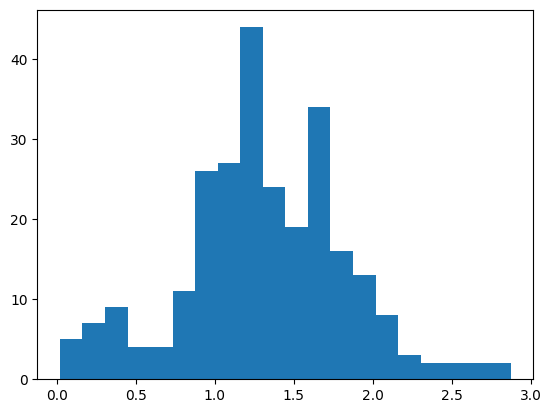

In [381]:
plt.hist(ddg,bins=20)

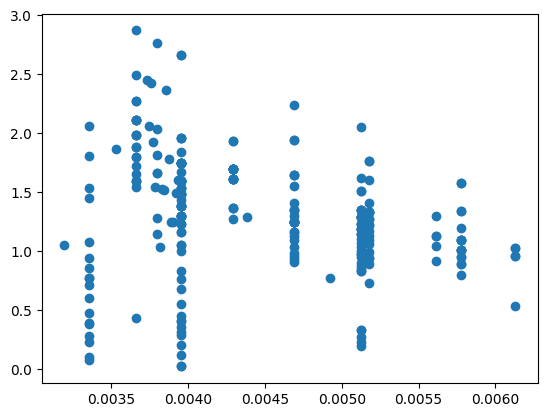

In [382]:
plt.scatter(alldesc["Temperature K"],ddg)


0.5716296004634123

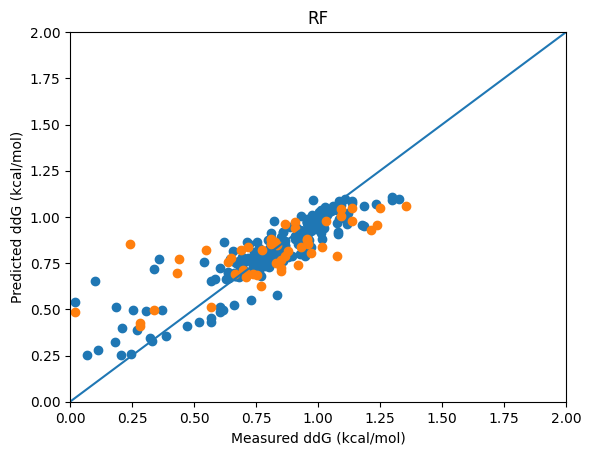

In [54]:
regressor = RandomForestRegressor(n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_depth=10).fit(xtrainscaled, np.log(ytrain+1))
ypred = regressor.predict(xtrainscaled)
ypredtest = regressor.predict(xtestscaled)
plt.scatter(np.log(ytrain+1), ypred)
plt.scatter(np.log(ytest+1), ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('RF')
plt.xlim([0,2])
plt.plot([0,3],[0,3])
plt.ylim([0,2])
r2_score(np.log(ytest+1), ypredtest)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.540874259638101

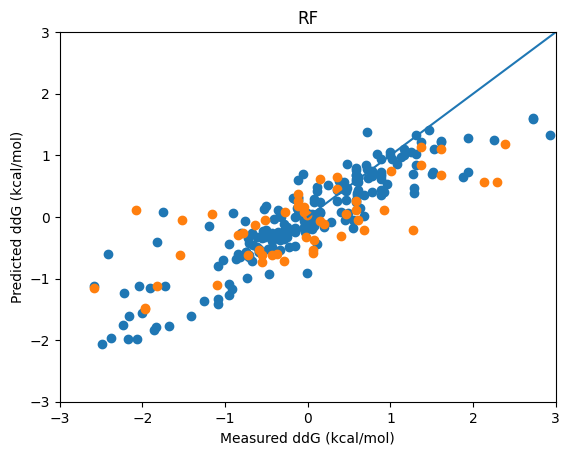

In [55]:
regressor = RandomForestRegressor(n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_depth=7).fit(xtrainscaled, ytrainstd)
ypred = regressor.predict(xtrainscaled)
ypredtest = regressor.predict(xtestscaled)
plt.scatter(ytrainstd, ypred)
plt.scatter(yteststd, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('RF')
plt.xlim([-3,3])
plt.plot([0,3],[0,3])
plt.ylim([-3,3])
r2_score (yteststd, ypredtest)

In [21]:
feature_importances = regressor.feature_importances_

# Select top features
top_features = xtrain.columns[feature_importances.argsort()[::-1][:-1]] 
id_imp=feature_importances.argsort()[::-1][:20]
top_features


Index(['Temperature K', 'RAxis_3', 'Box_vol', 'ster3', 'solv_dipol',
       'min_ddg_e', 'biggest distance', 'MolLogPelectrophile', 'sim_avg_n',
       'MolLogP', 'MinPartialChargeelectrophile', 'MinEStateIndexelectrophile',
       'sim_avg_e', 'bur_vol_x', 'ExactMolWtelectrophile', 'Vbur75',
       'max_ddg_e', 'qedelectrophile', 'L_x', 'Bmax_x', 'MolLogPnucleophile',
       'Kappa1electrophile', 'MaxPartialCharge', 'tot_V_x', '2_crippen_y',
       'disp_x', 'Bmin_x', 'MaxPartialChargeelectrophile', '4_crippen_y', 'nL',
       'nbur_vol', '3_crippen_y', 'ExactMolWt', 'disp_y', 'ster1',
       'mean_polar', 'max_ddg_n', 'min_ddg_n', 'nBmax', 'std_pol', 'Ncat_alif',
       'RAxis_2', 'HOMO', '2_crippen_x', '4_crippen_x',
       'MinPartialChargenucleophile', 'Ncat_arom', 'ster2', 'qednucleophile',
       'MinEStateIndexnucleophile', 'MaxPartialChargenucleophile', 'tot_V_y',
       'ExactMolWtnucleophile', '3_crippen_x', 'nBmin', 'Kappa1nucleophile'],
      dtype='object')

0.5542630739932531

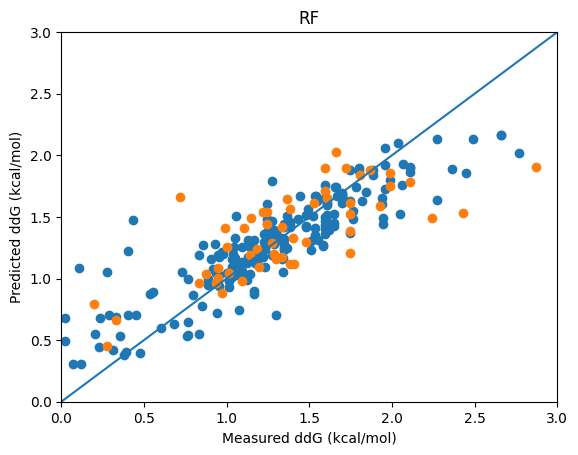

In [22]:
#xtrain, xtest, ytrain, ytest = train_test_split(alldesc[top_features], ddg, test_size=0.2, random_state=32)
#trainedscaler = StandardScaler().fit(xtrain)
#xtrainscaled = trainedscaler.transform(xtrain)
regressor = RandomForestRegressor(n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=20).fit(xtrainscaled[:,id_imp], ytrain)
ypred = regressor.predict(xtrainscaled[:,id_imp])
#xtestscaled = trainedscaler.transform(xtest[id_imp])
ypredtest = regressor.predict(xtestscaled[:,id_imp])
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlim([0,3])
plt.plot([0,3],[0,3])

plt.ylim([0,3])
plt.xlabel('Measured ddG (kcal/mol)')
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('RF')
r2_score (ytest, ypredtest)


In [599]:
import umap
def Umap_reduc(df,n=2):
    X = df

    # Initialize UMAP with the desired number of components (target dimension)
    n_components = n  # You can adjust this based on your requirements
    umap_model = umap.UMAP(n_components=n_components)

    # Fit and transform your data
    X_umap = pd.DataFrame(umap_model.fit_transform(X))
    return X_umap


nucleophiledescriptors_r = Umap_reduc(nucleophiledescriptors,4)
"""threethreesubdescriptors_r = Umap_reduc(threethreesubdescriptors,4)
nsubdescriptors_r = Umap_reduc(nsubdescriptors,4)
electrophiledescriptors_r = Umap_reduc(nsubdescriptors,4)"""

#alldescriptors_r = electrophiledescriptors_r.join(nucleophiledescriptors_r, lsuffix='electrophile', rsuffix='nucleophile').join(threethreesubdescriptors_r, rsuffix='threethreesub').join(nsubdescriptors_r, rsuffix='nsubdescriptors')



'threethreesubdescriptors_r = Umap_reduc(threethreesubdescriptors,4)\nnsubdescriptors_r = Umap_reduc(nsubdescriptors,4)\nelectrophiledescriptors_r = Umap_reduc(nsubdescriptors,4)'

0.6469696641906172

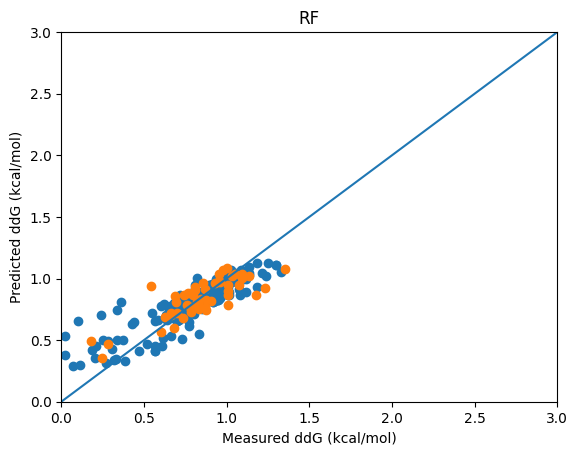

In [23]:
regressor = RandomForestRegressor(n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_depth=7).fit(xtrainscaled, np.log(ytrain+1))
ypred = regressor.predict(xtrainscaled)
ypredtest = regressor.predict(xtestscaled)
plt.scatter(np.log(1+ytrain), ypred)
plt.scatter(np.log(ytest+1), ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([0,3],[0,3])

plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('RF')
r2_score (np.log(1+ytest), ypredtest)


0.5631448572119909 0.10964901958971333 0.25016517081314044


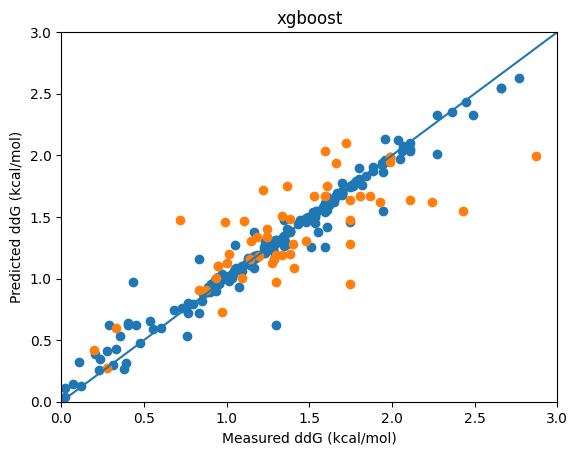

In [25]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.6,  subsample=0.8,learning_rate = 0.03,
                max_depth = 7, alpha = 0.6, n_estimators = 1000)
"""ytrainedscaler = StandardScaler().fit(np.array(ytrain).reshape(-1,1))
ytrainscaled = ytrainedscaler.transform(np.array(ytrain).reshape(-1,1))
ytestscaled = ytrainedscaler.transform(np.array(ytest).reshape(-1,1))"""
# Fit the model to the training data
xg_reg.fit(xtrainscaled[:,id_imp], ytrain)

# Predict on the test set
ypred = xg_reg.predict(xtrainscaled[:,id_imp])
ypredtest = xg_reg.predict(xtestscaled[:,id_imp])
# Evaluate the model
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('xgboost')
print(r2_score (ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
import shap


# Create a GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.03, max_depth=5, random_state=42)

# Fit the model to the training data
gb_reg.fit(xtrainscaled, ytrain)
ypred = gb_reg.predict(xtrainscaled)
ypredtest = gb_reg.predict(xtestscaled)
# Explain the model's predictions using SHAP values
explainer = shap.Explainer(gb_reg)
shap_values = explainer.shap_values(xtest)


# Summary plot
#shap.summary_plot(shap_values, xtest)
r2_score(ytest, ypredtest)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


0.5091675998452689

[13:22:36] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


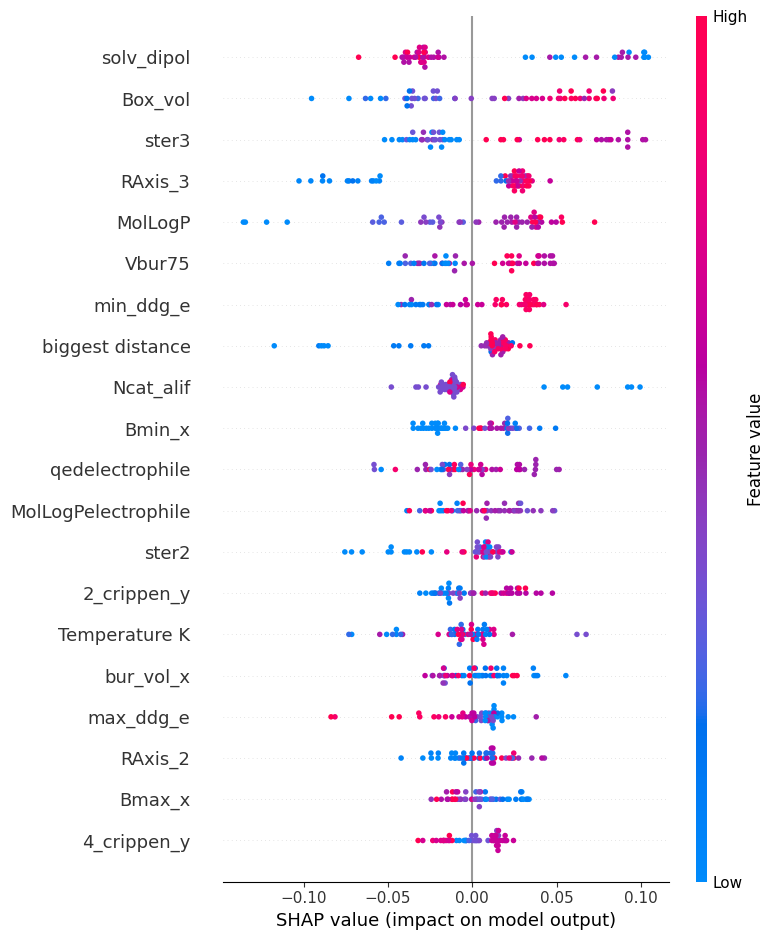

In [28]:
# Create an XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 0.5, n_estimators = 100)

# Fit the model to the training data
xg_reg.fit(xtrainscaled, ytrain)

# Explain the model's predictions using SHAP values
explainer = shap.Explainer(xg_reg)
shap_values = explainer.shap_values(xtestscaled)

# Summary plot
shap.summary_plot(shap_values, xtest)

0.5692075534897179 0.10812730532378892 0.2584168273015728


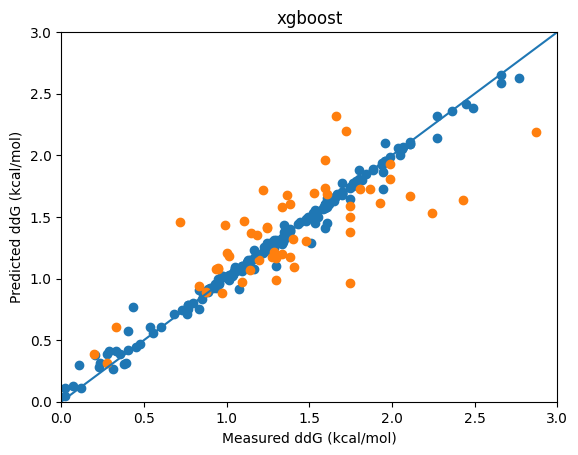

In [29]:

# Use Recursive Feature Elimination (RFE)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, eta=0.05, subsample=0.7,learning_rate = 0.03,
                max_depth = 7, alpha = 0.5, n_estimators = 1000)
rfe = RFE(estimator=xg_reg, n_features_to_select=30)  # Set the desired number of features
X_train_rfe = rfe.fit_transform(xtrainscaled, ytrain)
X_test_rfe = rfe.transform(xtestscaled)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, eta=0.05, subsample=0.7,learning_rate = 0.03,
                max_depth = 7, alpha = 0.5, n_estimators = 1000)
xg_reg.fit(X_train_rfe, ytrain)

ypred = xg_reg.predict(X_train_rfe)
ypredtest = xg_reg.predict(X_test_rfe)
# Evaluate the model
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('xgboost')
print(r2_score (ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

In [30]:
#xg_reg = RandomForestRegressor(n_estimators=0)#
rfe = RFE(estimator=xg_reg, n_features_to_select=30)  # Set the desired number of features
X_train_rfe = rfe.fit_transform(xtrainscaled, ytrain)
X_test_rfe = rfe.transform(xtestscaled)
xg_reg = RandomForestRegressor(n_estimators=1000)# Fit the model to the training data with selected features
xg_reg.fit(X_train_rfe, ytrain)

ypred = xg_reg.predict(X_train_rfe)
ypredtest = xg_reg.predict(X_test_rfe)
# Evaluate the model
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('RF')

print(r2_score(ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

KeyboardInterrupt: 

0.5465010070610263 0.10863255957942629 0.2489892612286326


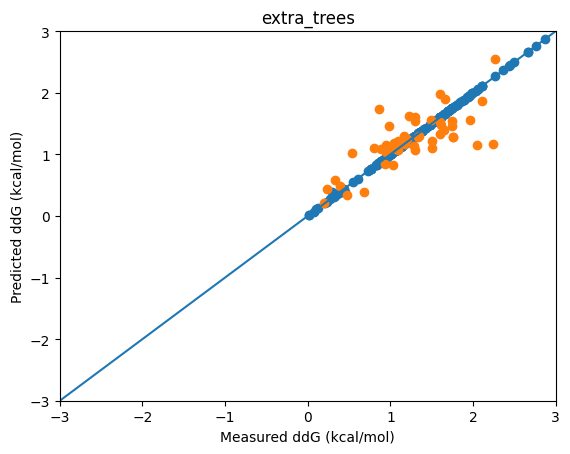

In [542]:
from sklearn.ensemble import ExtraTreesRegressor


extra_trees = ExtraTreesRegressor(n_estimators=100)
rfe = RFE(estimator=extra_trees, n_features_to_select=30)
X_train_rfe = rfe.fit_transform(xtrainscaled, ytrain)
X_test_rfe = rfe.transform(xtestscaled) 

xg_reg =  ExtraTreesRegressor(n_estimators=100)

# Fit the model to the training data
xg_reg.fit(X_train_rfe, ytrain)

# Make predictions on the test set
ypred = xg_reg.predict(X_train_rfe)
ypredtest = xg_reg.predict(X_test_rfe)
# Evaluate the model
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([-3,3])
plt.plot([-3,3],[-3,3])
plt.ylim([-3,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('extra_trees')
r2_score (ytest, ypredtest)
print(r2_score (ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

0.6599040722738236 0.11179791260051883 0.2486869519281641


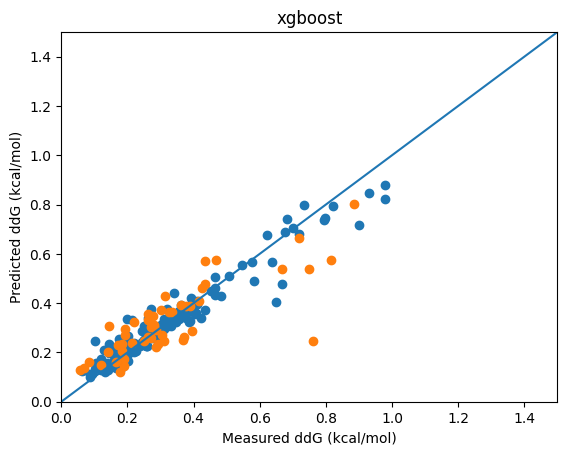

In [603]:
"""ytest_exp= np.exp(-ytest)
ytrain_exp= np.exp(-ytrain)"""
"""ytest_exp= ytest
ytrain_exp= ytrain"""
xg_reg = RandomForestRegressor(n_estimators=100)
ytest_exp= np.exp(-ytest)
ytrain_exp= np.exp(-ytrain)
# Use Recursive Feature Elimination (RFE)
rfe = RFE(estimator=xg_reg, n_features_to_select=30)  # Set the desired number of features
X_train_rfe = rfe.fit_transform(xtrainscaled, ytrain_exp)
X_test_rfe = rfe.transform(xtestscaled)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7,  subsample=0.7,learning_rate = 0.03,
                max_depth = 7, alpha = 0.5, n_estimators = 1000)
xg_reg.fit(X_train_rfe, ytrain_exp)

ypred = xg_reg.predict(X_train_rfe)
ypredtest = xg_reg.predict(X_test_rfe)
# Evaluate the model
plt.scatter(ytrain_exp, ypred)
plt.scatter(ytest_exp, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,1.5])
plt.plot([-3,3],[-3,3])
plt.ylim([0,1.5])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('xgboost')
r2_score (ytest_exp, ypredtest)
r2_score (ytest, -np.log(ypredtest))

print(r2_score(ytest, -np.log(ypredtest))
,mean_squared_error(ytest, -np.log(ypredtest))
,mean_absolute_error(ytest, -np.log(ypredtest)))

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() 
gpr = GaussianProcessRegressor(kernel=kernel,random_state=10).fit(xtrainscaled, ytrain)
ypred = gpr.predict(xtrainscaled)
ypredtest = gpr.predict(xtestscaled)
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([-3,3])
plt.plot([-3,3],[-3,3])

plt.ylim([-3,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('RF')
r2_score(ytest, ypredtest)

In [76]:
from scipy.stats import zscore
def remove_zscore_outliers(data, z_threshold=3):
    z_scores = np.abs(zscore(data))
    return data[(z_scores < z_threshold)]

rej = remove_zscore_outliers(xtrainscaled, z_threshold=5)

print(len(rej)/62,len(xtrainscaled))


201.6290322580645 205


In [2103]:

from sklearn.utils import resample
# Perform bootstrapping to create resampled datasets and train multiple models
num_bootstrap_samples = 30
bootstrap_models = []

for _ in range(num_bootstrap_samples):
    # Create a bootstrapped sample
    X_resampled, y_resampled = resample(xtrainscaled, ytrain, random_state=42)

    # Train a model on the resampled data
    bootstrap_model = RandomForestRegressor(n_estimators=100, random_state=42)
    bootstrap_model.fit(X_resampled, y_resampled)

    # Add the model to the list
    bootstrap_models.append(bootstrap_model)

# Make predictions on the test set using the ensemble of bootstrapped models
bootstrap_predictions = [model.predict(xtestscaled) for model in bootstrap_models]

# Average the predictions from all models
ensemble_predictions = pd.DataFrame(bootstrap_predictions).mean()

# Evaluate the performance on the bootstrapped ensemble
r2_score(ytest, ensemble_predictions)

0.559440399518626

In [ ]:
from sklearn.linear_model import HuberRegressor



# Create a Huber Regressor model
huber_model = HuberRegressor(epsilon=20,max_iter=10000)  # epsilon is a tuning parameter



# Fit the model to the training data
huber_model.fit(xtrainscaled, ytrain)

# Make predictions on the test set
ypred = huber_model.predict(xtrainscaled)
ypredtest = huber_model.predict(xtestscaled)
# Evaluate the model
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([-3,3])
plt.plot([-3,3],[-3,3])
plt.ylim([-3,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('extra_trees')
r2_score(ytest, ypredtest)

0.5815147961632016 0.10503823308719394 0.25358407536524175


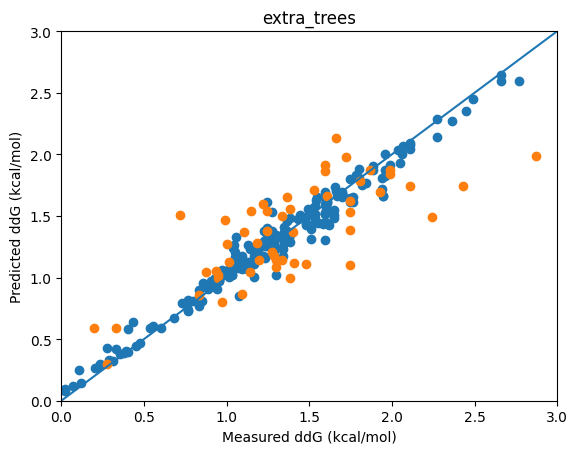

In [33]:


# Assuming X is your feature matrix and y is your target variable
# Split the data into training and testing sets

# Assign weights based on some criteria (e.g., higher weight for certain instances)
weights = np.ones_like(ytrain)  # Use equal weights for all samples initially

# Assume you want to assign higher weight to samples where y is above a certain threshold
weights[ytrain < 1] = 2
weights[ytrain > 2] = 2
# Replicate instances based on their weights
X_train_weighted = np.repeat(xtrainscaled, weights.astype(int), axis=0)
y_train_weighted = np.repeat(ytrain, weights.astype(int))
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_depth=20)

# Fit the model on the training data with weighted sampling
rf_model.fit(X_train_weighted, y_train_weighted)

ypred = rf_model.predict(xtrainscaled)

ypredtest = rf_model.predict(xtestscaled)

# Evaluate the performance using Mean Squared Error
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('extra_trees')
print(r2_score (ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

0.638063860967267 0.12387519164643417 0.2561628841315612


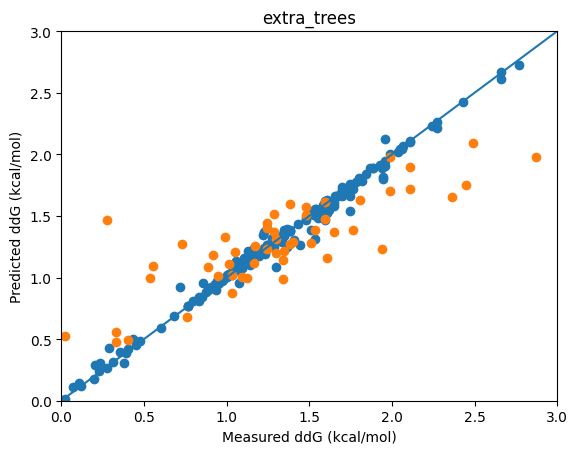

In [56]:


# Assuming X is your feature matrix and y is your target variable
# Split the data into training and testing sets

# Assign weights based on some criteria (e.g., higher weight for certain instances)
weights = np.ones_like(ytrain)  # Use equal weights for all samples initially

# Assume you want to assign higher weight to samples where y is above a certain threshold
threshold = 0.7
weights[ytrain < 1] = 2
weights[ytrain > 2] = 2
# Replicate instances based on their weights
X_train_weighted = np.repeat(xtrainscaled, weights.astype(int), axis=0)
y_train_weighted = np.repeat(ytrain, weights.astype(int))

# Create a Random Forest Regressor model
rf_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7,  subsample=0.5,learning_rate = 0.03,
                max_depth = 7, alpha = 0.5, n_estimators = 1000,tree_method="hist")

# Fit the model on the training data with weighted sampling
rf_model.fit(X_train_weighted, y_train_weighted)

ypred = rf_model.predict(xtrainscaled)

ypredtest = rf_model.predict(xtestscaled)

# Evaluate the performance using Mean Squared Error
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('extra_trees')
print(r2_score (ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

0.6110073910274749 0.09763570122872513 0.2309188361273586


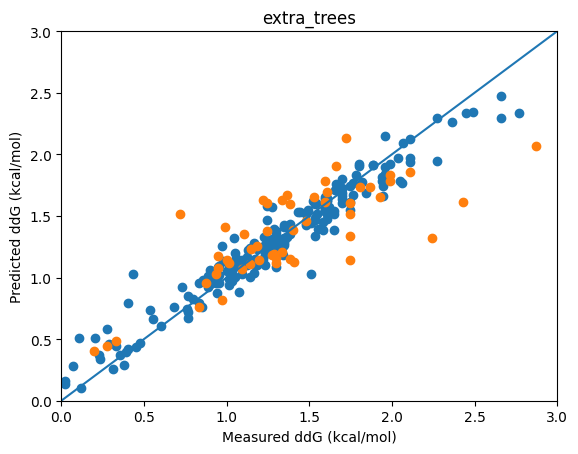

In [36]:

# Assign weights based on some criteria (e.g., higher weight for certain instances)
weights = np.ones_like(ytrain)  # Use equal weights for all samples initially

# Assume you want to assign higher weight to samples where y is above a certain threshold
weights[ytrain < 1] = 1
weights[ytrain > 2] = 1
# Replicate instances based on their weights
X_train_weighted = np.repeat(xtrainscaled, weights.astype(int), axis=0)
y_train_weighted = np.repeat(ytrain, weights.astype(int))
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7,  learning_rate = 0.03,
                max_depth = 15, alpha = 0.5, n_estimators = 100,tree_method="hist")
rfe = RFE(estimator=xg_reg, n_features_to_select=30)  # Set the desired number of features
X_train_rfe = rfe.fit_transform(X_train_weighted, y_train_weighted)
X_test_rfe = rfe.transform(xtestscaled)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7,  subsample=0.2,learning_rate = 0.03,
                max_depth = 15, alpha = 0.5, n_estimators = 1000,tree_method="hist")
xg_reg.fit(X_train_rfe, y_train_weighted)

ypred = xg_reg.predict(X_train_rfe)
ypredtest = xg_reg.predict(X_test_rfe)
# Create a Random Forest Regressor model


# Evaluate the performance using Mean Squared Error
plt.scatter(y_train_weighted, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('extra_trees')
print(r2_score (ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

In [37]:
feature_ranking = rfe.ranking_

# Get the indices of the selected features
selected_feature_indices = np.where(feature_ranking == 1)[0]

# Use the indices to get the corresponding feature names from the original feature matrix
selected_feature_names = xtrain.columns[selected_feature_indices]

# Print or use the selected feature names as needed
print("Selected Features:", selected_feature_names)

Selected Features: Index(['MaxPartialChargenucleophile', 'MinEStateIndexelectrophile',
       'MinEStateIndexnucleophile', 'MinPartialChargeelectrophile',
       'MolLogPelectrophile', 'MolLogPnucleophile', 'qednucleophile',
       'ExactMolWtelectrophile', 'ExactMolWt', 'MaxPartialCharge', 'ster3',
       'HOMO', 'Temperature K', 'mean_polar', 'biggest distance', 'nBmax',
       'tot_V_y', 'disp_y', '4_crippen_x', 'Box_vol', 'RAxis_2', 'RAxis_3',
       'Ncat_alif', 'Ncat_arom', 'solv_dipol', 'min_ddg_e', 'max_ddg_e',
       'sim_avg_n', 'min_ddg_n', 'max_ddg_n'],
      dtype='object')


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

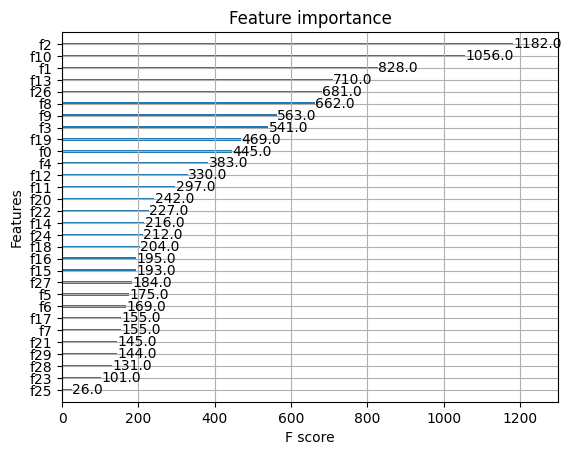

In [625]:
xgb.plot_importance(xg_reg)

[12:09:11] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


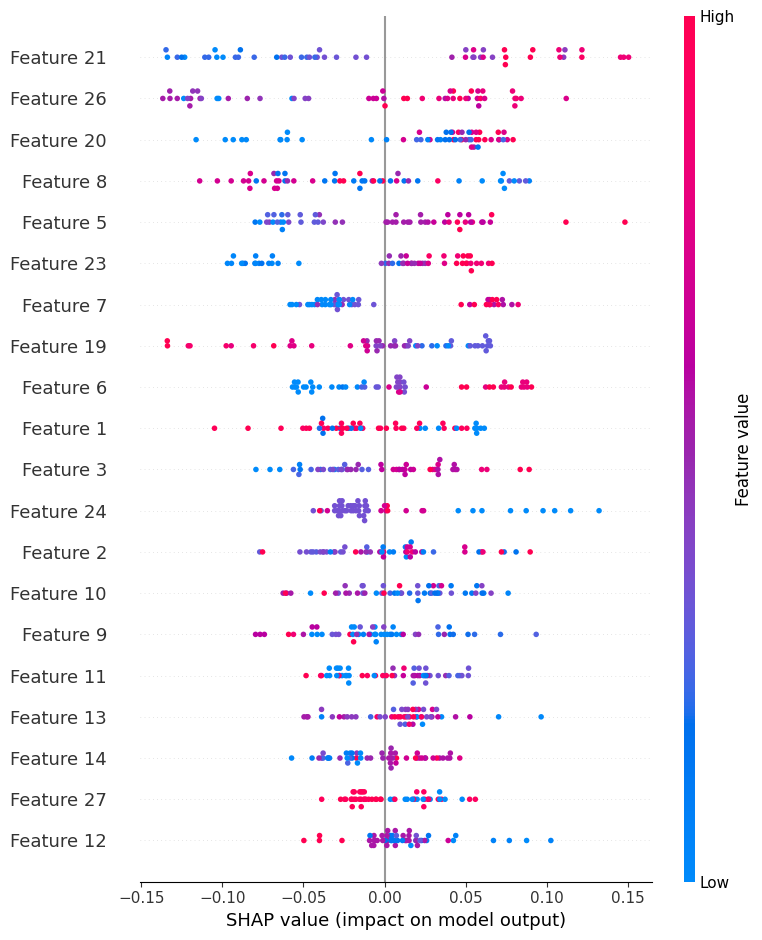

In [626]:
explainer = shap.Explainer(xg_reg)
shap_values = explainer.shap_values(X_test_rfe)

# Summary plot
shap.summary_plot(shap_values, X_test_rfe)

0.5884368962556231 0.1408603696972221 0.2757414459716801


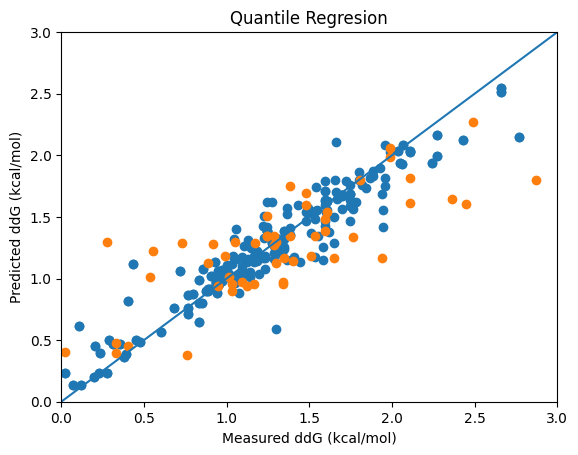

In [57]:
from quantile_forest import RandomForestQuantileRegressor
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=0,shuffle=True)

qrf = RandomForestQuantileRegressor(n_estimators = 100,max_depth=20, min_samples_leaf=4, min_samples_split= 5)

rfe = RFE(estimator=qrf, n_features_to_select=30)  # Set the desired number of features
X_train_rfe = rfe.fit_transform(X_train_weighted, y_train_weighted)
X_test_rfe = rfe.transform(xtestscaled)

qrf = RandomForestQuantileRegressor(n_estimators = 1000,max_depth=20, min_samples_leaf=4, min_samples_split= 5)
qrf.fit(X_train_rfe, y_train_weighted)

# Make predictions on the test set
ypred = qrf.predict(X_train_rfe, quantiles=[0.25, 0.5, 0.75])
ypred2 = (ypred[:,2] + 2*ypred[:,1] + ypred[:,0])/4

ypredtest = qrf.predict(X_test_rfe, quantiles=[0.25, 0.5, 0.75])
ypredtest2 = (ypredtest[:,1] + 2*ypredtest[:,1] + ypredtest[:,1])/4
# Evaluate the model
plt.scatter(y_train_weighted, ypred2)
plt.scatter(ytest, ypredtest2)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('Quantile Regresion')
print(r2_score (ytest, ypredtest2)
,mean_squared_error(ytest, ypredtest2)
,mean_absolute_error(ytest, ypredtest2))

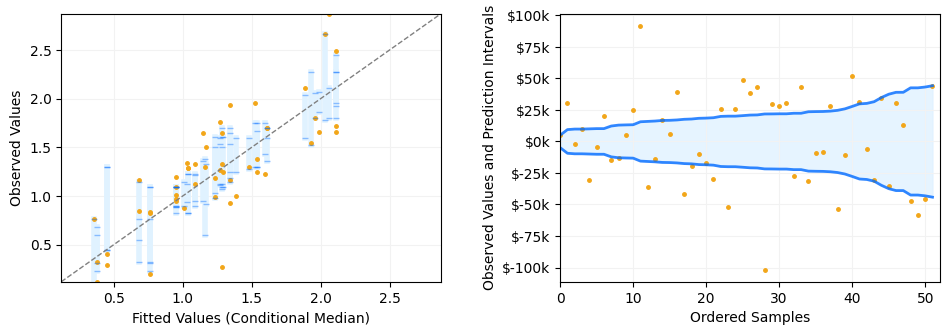

In [628]:

from matplotlib.ticker import FuncFormatter
y_true = []
y_pred = []
y_pred_low = []
y_pred_upp = []
y_true = np.concatenate((y_true, ytest))
y_pred = np.concatenate((y_pred, ypredtest2))
y_pred_low = np.concatenate((y_pred_low, ypredtest[:, 0]))
y_pred_upp = np.concatenate((y_pred_upp, ypredtest[:, 2]))

def plot_calibration_and_intervals(y_true, y_pred, y_pred_low, y_pred_upp):
    def plot_calibration(ax, y_true, y_pred_low, y_pred_upp, price_formatter):
        for low, mid, upp in zip(y_pred_low, y_pred, y_pred_upp):
            ax.plot([mid, mid], [low, upp], lw=4, c="#e0f2ff")

        ax.plot(y_pred, y_true, c="#f2a619", lw=0, marker=".", ms=5)
        ax.plot(y_pred, y_pred_low, alpha=0.4, c="#006aff", lw=0, marker="_", ms=4)
        ax.plot(y_pred, y_pred_upp, alpha=0.4, c="#006aff", lw=0, marker="_", ms=4)

        lims = [
            np.min(np.minimum(y_true, y_pred)),  # min of both axes
            np.max(np.maximum(y_true, y_pred)),  # max of both axes
        ]
        ax.plot(lims, lims, ls="--", lw=1, c="grey")
        ax.grid(axis="x", color="0.95")
        ax.grid(axis="y", color="0.95")

        ax.set_xlim(lims)
        ax.set_ylim(lims)
        ax.set_xlabel("Fitted Values (Conditional Median)")
        ax.set_ylabel("Observed Values")

    def plot_intervals(ax, y_true, y_pred_low, y_pred_upp, price_formatter):
        # Center data, with the mean of the prediction interval at 0.
        mean = (y_pred_low + y_pred_upp) / 2
        y_true -= mean
        y_pred_low -= mean
        y_pred_upp -= mean

        ax.plot(y_true, c="#f2a619", lw=0, marker=".", ms=5)
        ax.fill_between(
            np.arange(len(y_pred_upp)),
            y_pred_low,
            y_pred_upp,
            alpha=0.8,
            color="#e0f2ff",
        )
        ax.plot(np.arange(len(y_true)), y_pred_low, alpha=0.8, c="#006aff", lw=2)
        ax.plot(np.arange(len(y_true)), y_pred_upp, alpha=0.8, c="#006aff", lw=2)
        ax.grid(axis="x", color="0.95")
        ax.grid(axis="y", color="0.95")
        ax.yaxis.set_major_formatter(price_formatter)
        ax.set_xlim([0, len(y_true)])
        ax.set_xlabel("Ordered Samples")
        ax.set_ylabel("Observed Values and Prediction Intervals")

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    usd_formatter = FuncFormatter(lambda x, p: f"${format(int(x * 100), ',')}k")

    y_pred_interval = y_pred_upp - y_pred_low
    sort_idx = np.argsort(y_pred)
    y_true = y_true[sort_idx]
    y_pred = y_pred[sort_idx]
    y_pred_low = y_pred_low[sort_idx]
    y_pred_upp = y_pred_upp[sort_idx]

    plot_calibration(ax1, y_true, y_pred_low, y_pred_upp, usd_formatter)

    y_pred_interval = y_pred_upp - y_pred_low
    sort_idx = np.argsort(y_pred_interval)
    y_true = y_true[sort_idx]
    y_pred_low = y_pred_low[sort_idx]
    y_pred_upp = y_pred_upp[sort_idx]

    plot_intervals(ax2, y_true, y_pred_low, y_pred_upp, usd_formatter)

    plt.subplots_adjust(top=0.15)
    fig.tight_layout(pad=3)

    plt.show()


plot_calibration_and_intervals(y_true, y_pred, y_pred_low, y_pred_upp)

In [ ]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05,n_estimators = 1000)

# Fit the model and obtain outlier scores
outlier_scores = isolation_forest.fit_predict(xtrainscaled)

# Identify outliers (points with score of -1)
outlier_indices = np.where(outlier_scores == -1)[0]



outlier_scores2 = isolation_forest.predict(xtestscaled)
outlier_indices2 = np.where(outlier_scores2 == -1)[0]

# Scatter plot of the feature matrix
"""plt.scatter(ytrain, ypred, label='Inliers', color='blue')

# Highlight outliers in red
plt.scatter(ytrain.values[outlier_indices], ypred[outlier_indices], label='Outliers', color='red')"""

plt.scatter(ytest, ypredtest, label='Inliers', color='blue')

# Highlight outliers in red
plt.scatter(ytest.values[outlier_indices2], ypredtest[outlier_indices2], label='Outliers', color='orange')


plt.show()

0.5141244547066052 0.12195295869480245 0.26593943957660016


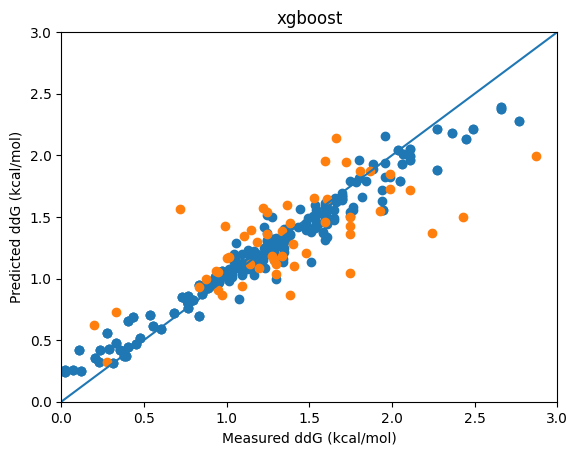

In [39]:
x_train_no_outliers = xtrainscaled
y_train_no_outliers = ytrain
weights = np.ones_like(y_train_no_outliers)  # Use equal weights for all samples initially

# Assume you want to assign higher weight to samples where y is above a certain threshold
threshold = 0.7
weights[y_train_no_outliers < 1] = 3
weights[y_train_no_outliers > 2] = 2
# Replicate instances based on their weights
x_train_no_outliers = np.repeat(x_train_no_outliers, weights.astype(int), axis=0)
y_train_no_outliers = np.repeat(y_train_no_outliers, weights.astype(int))

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, eta=0.01, subsample=0.7,learning_rate = 0.03,
                max_depth = 7, alpha = 0.5, n_estimators = 100)
xg_reg.fit(x_train_no_outliers, y_train_no_outliers)

ypred = xg_reg.predict(x_train_no_outliers)
ypredtest = xg_reg.predict(xtestscaled)
# Evaluate the model
plt.scatter(y_train_no_outliers, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('xgboost')
print(r2_score(ytest, ypredtest)
,mean_squared_error(ytest, ypredtest)
,mean_absolute_error(ytest, ypredtest))

0.5911335779535979 0.1399374114012122 0.2880038547380615


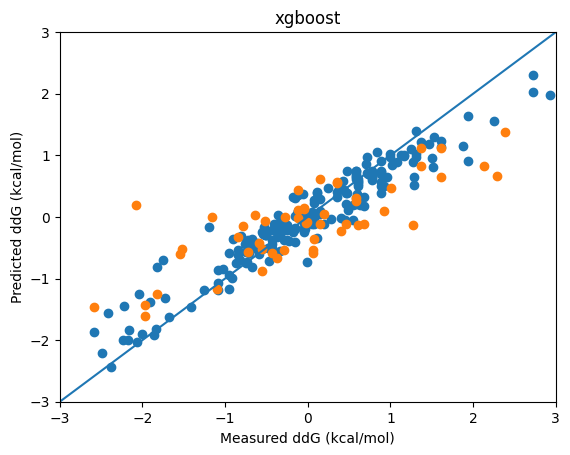

In [58]:
y_train_no_outliers = ytrain
weights = np.ones_like(y_train_no_outliers)  # Use equal weights for all samples initially

# Assume you want to assign higher weight to samples where y is above a certain threshold
threshold = 0.7
weights[y_train_no_outliers < 1] = 1
weights[y_train_no_outliers > 2] = 1
# Replicate instances based on their weights
x_train_no_outliers = np.repeat(xtrainscaled, weights.astype(int), axis=0)
y_train_no_outliers = np.repeat(ytrainstd, weights.astype(int))

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, eta=0.01, subsample=0.7,learning_rate = 0.05,
                max_depth = 4, alpha = 0.2, n_estimators = 100)
xg_reg.fit(x_train_no_outliers, y_train_no_outliers)

ypred = xg_reg.predict(x_train_no_outliers)
ypredtest = xg_reg.predict(xtestscaled)
# Evaluate the model
plt.scatter(y_train_no_outliers, ypred)
plt.scatter(yteststd, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([-3,3])
plt.plot([-3,3],[-3,3])
plt.ylim([-3,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('xgboost')
ypredtest = trainedscaler1.inverse_transform(ypredtest.reshape(-1, 1))
print(r2_score(ytest, ypredtest),mean_squared_error(ytest, ypredtest), mean_absolute_error(ytest, ypredtest))

In [632]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.datasets import make_regression

# Assuming X and y are your feature matrix and target variable
X, y = make_regression(n_samples=100, n_features=30, random_state=42)

# Create XGBoost regressor
xgb_model = XGBRegressor()

# Define the hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [10, 20, 30, 50, 100, 200, 1000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 7, 10, 12, 15],
    'alpha': [0, 0.1, 0.3, 0.5, 0.7, 1],  # Regularization term
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

# Create GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid,  scoring='neg_mean_absolute_error', cv=10)
xgb_grid_search.fit(xtrainscaled, ytrain)

# Print the best parameters and corresponding score
print("Best Parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best Score for XGBoost:", -xgb_grid_search.best_score_)


In [286]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create Random Forest regressor
rf_model = RandomForestRegressor()

# Define the hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'max_depth': [5, 10, 20, 25],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Create GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=10)
rf_grid_search.fit(xtrainscaled, ytrain)

# Print the best parameters and corresponding score
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best Score for Random Forest:", -rf_grid_search.best_score_)


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 20}
Best Score for Random Forest: 0.13845274179829262


0.5676944111591777

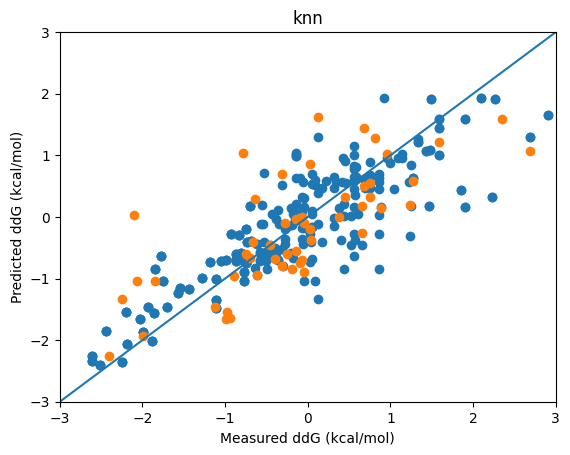

In [2161]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5,weights='uniform', algorithm='auto')  # You can adjust the number of neighbors (k) based on your preference

# Fit the model
knn_regressor.fit(x_train_no_outliers, y_train_no_outliers)

# Make predictions on the test set
ypred = knn_regressor.predict(x_train_no_outliers)
ypredtest = knn_regressor.predict(xtestscaled)
# Evaluate the model
plt.scatter(y_train_no_outliers, ypred)
plt.scatter(yteststd, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([-3,3])
plt.plot([-3,3],[-3,3])
plt.ylim([-3,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('knn')

r2_score(yteststd, ypredtest)


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_validate

rep_cv = RepeatedKFold(n_splits=10,n_repeats=10)
cv_model = cross_validate(
    regressor_tuned,
    X_train,
    y_train,
    cv = rep_cv,
    scoring=('r2','neg_mean_absolute_error')
)
cv_r2 = (np.average(cv_model['test_r2']))

#LOO
loo = LeaveOneOut()
loo_model = cross_val_predict(
    regressor_tuned,
    X_train,
    y_train,
    cv = loo,
)
loo_r2 = r2_score(y_train,loo_model)  

In [ ]:
import joblib

# Assuming 'best_model' is the best model obtained from the hyperparameter tuning
# Save the best model to a file
model_filename = 'best_xgboost_model.joblib'
joblib.dump(best_model, model_filename)

print(f"Best model saved to {model_filename}")
